# Problem Statement

Based on the given loan data can we understand the major factors or characteristics of a borrower which makes them to get into delinquent stage.

• Delinquency is a major metric in assessing risk, as more and more customers getting delinquent means the risk of customers that will default will also increase.

• The main objective is to minimize the risk for which you need to build a decision tree model using CART technique that will identify various risk and non-risk attributes of borrower’s to get into delinquent stage

# Importing libraries and Loading data

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
ld_df = pd.read_csv("heart.csv")

# Checking the data

In [5]:
ld_df.head()
ld_df.count

<bound method DataFrame.count of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1   

### Dropping unwanted variables

Sdelinquent can also be dropped instead of delinquent.

In [4]:
ld_df=ld_df.drop(["ID","delinquent"],axis=1) 

KeyError: "['ID' 'delinquent'] not found in axis"

In [6]:
ld_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
ld_df.shape

(303, 14)

In [8]:
ld_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


many columns are of type object i.e. strings. These need to be converted to ordinal type

### Geting unique counts of all Objects

In [9]:
print('term \n',ld_df.term.value_counts())
print('\n')
print('gender \n',ld_df.gender.value_counts())
print('\n')
print('purpose \n',ld_df.purpose.value_counts())
print('\n')
print('home_ownership \n',ld_df.home_ownership.value_counts())
print('\n')
print('age \n',ld_df.age.value_counts())
print('\n')
print('FICO \n',ld_df.FICO.value_counts())

AttributeError: 'DataFrame' object has no attribute 'term'

### Note:
Decision tree in Python can take only numerical / categorical colums. It cannot take string / object types. 

The following code loops through each column and checks if the column type is object then converts those columns into categorical with each distinct value becoming a category.

In [9]:
for feature in ld_df.columns: 
    if ld_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(ld_df[feature].unique()))
        print(pd.Categorical(ld_df[feature].unique()).codes)
        ld_df[feature] = pd.Categorical(ld_df[feature]).codes



feature: term
[36 months, 60 months]
Categories (2, object): [36 months, 60 months]
[0 1]


feature: gender
[Female, Male]
Categories (2, object): [Female, Male]
[0 1]


feature: purpose
[House, Car, Other, Personal, Wedding, Medical, other]
Categories (7, object): [Car, House, Medical, Other, Personal, Wedding, other]
[1 0 3 4 5 2 6]


feature: home_ownership
[Mortgage, Rent, Own]
Categories (3, object): [Mortgage, Own, Rent]
[0 2 1]


feature: age
[>25, 20-25]
Categories (2, object): [20-25, >25]
[1 0]


feature: FICO
[300-500, >500]
Categories (2, object): [300-500, >500]
[0 1]


For each feature, look at the 2nd and 4th row to get the encoding mappings. Do not look at the line starting with 'Categories'

#### Comparing the unique counts from above

In [10]:
print('term \n',ld_df.term.value_counts())
print('\n')
print('gender \n',ld_df.gender.value_counts())
print('\n')
print('purpose \n',ld_df.purpose.value_counts())
print('\n')
print('home_ownership \n',ld_df.home_ownership.value_counts())
print('\n')
print('age \n',ld_df.age.value_counts())
print('\n')
print('FICO \n',ld_df.FICO.value_counts())

term 
 0    10589
1      959
Name: term, dtype: int64


gender 
 1    6555
0    4993
Name: gender, dtype: int64


purpose 
 1    6892
0    2080
3     928
4     892
5     408
2     266
6      82
Name: purpose, dtype: int64


home_ownership 
 0    5461
2    5216
1     871
Name: home_ownership, dtype: int64


age 
 0    5888
1    5660
Name: age, dtype: int64


FICO 
 0    6370
1    5178
Name: FICO, dtype: int64


In [11]:
ld_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Sdelinquent     11548 non-null  int64
 1   term            11548 non-null  int8 
 2   gender          11548 non-null  int8 
 3   purpose         11548 non-null  int8 
 4   home_ownership  11548 non-null  int8 
 5   age             11548 non-null  int8 
 6   FICO            11548 non-null  int8 
dtypes: int64(1), int8(6)
memory usage: 158.0 KB


In [12]:
ld_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Label Encoding has been done and all columns are converted to number

### Proportion of 1s and 0s

In [13]:
ld_df.Sdelinquent.value_counts(normalize=True)

1    0.668601
0    0.331399
Name: Sdelinquent, dtype: float64

In [14]:
print(ld_df.Sdelinquent.value_counts())
print('%1s = ',7721/(7721+3827)*100)
print('%0s = ',3827/(7721+3827)*100)

1    7721
0    3827
Name: Sdelinquent, dtype: int64
%1s =  66.8600623484586
%0s =  33.13993765154139


### Extracting the target column into separate vectors for training set and test set

In [13]:
X = ld_df.drop("target", axis=1)

y = ld_df.pop("target")

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### Splitting data into training and test set

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

### Checking the dimensions of the training and test data

In [15]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs',8083+3465)

X_train (212, 13)
X_test (91, 13)
train_labels (212,)
test_labels (91,)
Total Obs 11548


### Building a Decision Tree Classifier

In [16]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=0, max_depth = 7)

In [17]:
# Fit the model
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [18]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()


The above code will save a .dot file in your working directory.  
WebGraphviz is Graphviz in the Browser.   
Copy paste the contents of the file into the link below to get the visualization     
http://webgraphviz.com/

### Variable Importance

In [19]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


               Imp
cp        0.329712
ca        0.120537
exang     0.108641
trestbps  0.093184
oldpeak   0.085809
chol      0.080414
age       0.072520
thalach   0.055671
thal      0.035733
sex       0.017780
fbs       0.000000
restecg   0.000000
slope     0.000000


### Predicting Test Data

In [20]:
y_predict = dt_model.predict(X_test)

In [21]:
y_predict.shape

(91,)

# Regularising the Decision Tree

### Adding Tuning Parameters

In [22]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 30,min_samples_leaf=100,min_samples_split=1000,random_state=1)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=100,
                       min_samples_split=1000, random_state=1)

### Generating New Tree

In [23]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

### Variable Importance

In [24]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

          Imp
age       0.0
sex       0.0
cp        0.0
trestbps  0.0
chol      0.0
fbs       0.0
restecg   0.0
thalach   0.0
exang     0.0
oldpeak   0.0
slope     0.0
ca        0.0
thal      0.0


### Predicting on Training and Test dataset

In [25]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [26]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (212,)
ytest_predict (91,)


### Getting the Predicted Classes

In [27]:
ytest_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

### Getting the Predicted Probabilities

In [28]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.45754717, 0.54245283],
       [0.45754717, 0.54245283],
       [0.45754717, 0.54245283],
       [0.45754717, 0.54245283],
       [0.45754717, 0.54245283],
       [0.45754717, 0.54245283],
       [0.45754717, 0.54245283],
       [0.45754717, 0.54245283],
       [0.45754717, 0.54245283],
       [0.45754717, 0.54245283],
       [0.45754717, 0.54245283],
       [0.45754717, 0.54245283],
       [0.45754717, 0.54245283],
       [0.45754717, 0.54245283],
       [0.45754717, 0.54245283],
       [0.45754717, 0.54245283],
       [0.45754717, 0.54245283],
       [0.45754717, 0.54245283],
       [0.45754717, 0.54245283],
       [0.45754717, 0.54245283],
       [0.45754717, 0.54245283],
       [0.45754717, 0.54245283],
       [0.45754717, 0.54245283],
       [0.45754717, 0.54245283],
       [0.45754717, 0.54245283],
       [0.45754717, 0.54245283],
       [0.45754717, 0.54245283],
       [0.45754717, 0.54245283],
       [0.45754717, 0.54245283],
       [0.45754717, 0.54245283],
       [0.

In [29]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.457547,0.542453
1,0.457547,0.542453
2,0.457547,0.542453
3,0.457547,0.542453
4,0.457547,0.542453


# Model Evaluation

## Measuring AUC-ROC Curve

In [30]:
import matplotlib.pyplot as plt

In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

### AUC and ROC for the training data

AUC: 0.500


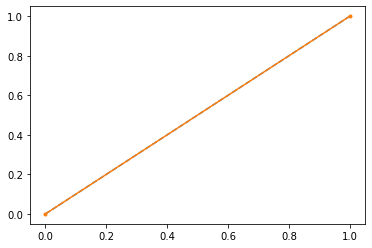

In [31]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### AUC and ROC for the test data

AUC: 0.500


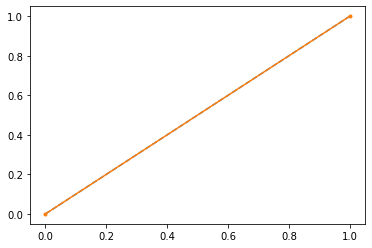

In [32]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Confusion Matrix for the training data

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
confusion_matrix(train_labels, ytrain_predict)

array([[  0,  97],
       [  0, 115]], dtype=int64)

In [35]:
#Train Data Accuracy
reg_dt_model.score(X_train,train_labels) 

0.5424528301886793

In [36]:
print((1985+4742)/(1985+650+706+4742))

0.832240504763083


In [37]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.54      1.00      0.70       115

    accuracy                           0.54       212
   macro avg       0.27      0.50      0.35       212
weighted avg       0.29      0.54      0.38       212



C:\Users\King\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Confusion Matrix for test data

In [38]:
confusion_matrix(test_labels, ytest_predict)

array([[ 0, 41],
       [ 0, 50]], dtype=int64)

In [39]:
#Test Data Accuracy
reg_dt_model.score(X_test,test_labels)

0.5494505494505495

In [40]:
print((922+1941)/(922+270+332+1941))

0.8262626262626263


In [41]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.55      1.00      0.71        50

    accuracy                           0.55        91
   macro avg       0.27      0.50      0.35        91
weighted avg       0.30      0.55      0.39        91



C:\Users\King\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Conclusion

Accuracy on the Training Data: 83%  
Accuracy on the Test Data: 82%

AUC on the Training Data: 87.9%  
AUC on the Test: 88.1%

Accuracy, AUC, Precision and Recall for test data is almost inline with training data.  
This proves no overfitting or underfitting has happened, and overall the model is a good model for classification

FICO, term and gender (in same order of preference) are the most important variables in determining if a borrower will get into a delinquent stage 

                                               Happy Learning